In [8]:
import mapclassify as mc
import pandas as pd #used to read in the revenue file 
import matplotlib.pyplot as plt #for plotting#to read in shape file and provides high #level interface with #matplotlib library for making maps
import geopandas as gpd#import locally saved file
import seaborn as sns

## Dataset homicide

In [30]:
homicide_datapath = 'Dataset/homicide_intentional_.xlsx'
homicide_dataset = pd.read_excel(homicide_datapath)
homicide_dataset.columns = homicide_dataset.iloc[1]
homicide_dataset = homicide_dataset[2:]
homicide_dataset = homicide_dataset.drop_duplicates()
homicide_dataset = homicide_dataset[(homicide_dataset.Year >= 2000) & (homicide_dataset.Year <= 2020)]
homicide_dataset = homicide_dataset.loc[homicide_dataset['Unit of measurement'] == 'Rate per 100,000 population']
homicide_dataset = homicide_dataset.loc[homicide_dataset['Indicator'] == 'Victims of intentional homicide']
homicide_dataset = homicide_dataset.loc[homicide_dataset['Dimension'] == 'Total']
homicide_dataset = homicide_dataset.loc[homicide_dataset['Category'] == 'Total']
homicide_dataset = homicide_dataset.loc[homicide_dataset['Sex'] == 'Total']
homicide_dataset = homicide_dataset.loc[homicide_dataset['Age'] == 'Total']
homicide_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2820 entries, 48047 to 62667
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Iso3_code            2820 non-null   object
 1   Country              2820 non-null   object
 2   Region               2820 non-null   object
 3   Subregion            2820 non-null   object
 4   Indicator            2820 non-null   object
 5   Dimension            2820 non-null   object
 6   Category             2820 non-null   object
 7   Sex                  2820 non-null   object
 8   Age                  2820 non-null   object
 9   Year                 2820 non-null   object
 10  Unit of measurement  2820 non-null   object
 11  VALUE                2820 non-null   object
 12  Source               2820 non-null   object
dtypes: object(13)
memory usage: 308.4+ KB


In [31]:
homicide_dataset.head()

1,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
48047,ABW,Aruba,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,2001,"Rate per 100,000 population",4.306076,MD
48048,ABW,Aruba,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,2002,"Rate per 100,000 population",5.263601,MD
48049,ABW,Aruba,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,2003,"Rate per 100,000 population",4.123031,MD
48050,ABW,Aruba,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,2004,"Rate per 100,000 population",2.02544,MD
48051,ABW,Aruba,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,2005,"Rate per 100,000 population",5.99832,MD


In [32]:
print(sum(homicide_dataset['Iso3_code'] == 'AUS'))
print(sum(homicide_dataset['Iso3_code'] == 'BRA'))
print(sum(homicide_dataset['Iso3_code'] == 'IND'))
print(sum(homicide_dataset['Iso3_code'] == 'SWE'))
print(sum(homicide_dataset['Iso3_code'] == 'USA'))
print(sum(homicide_dataset['Iso3_code'] == 'ZAF'))

21
21
21
21
18
21


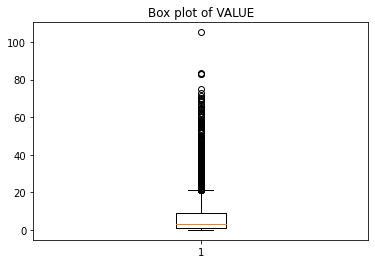

In [33]:
plt.boxplot(homicide_dataset.VALUE)
plt.title("Box plot of VALUE")
plt.show()

## Dataset chômage

In [36]:
unemployment_path = 'Dataset/unemployment.csv'
unemployment_dataset = pd.read_csv(unemployment_path, sep = ';')
pd_unemployment = unemployment_dataset.drop_duplicates()
pd_unemployment = pd_unemployment[unemployment_dataset['Country Code'].isin(['AUS', 'BRA', 'IND', 'SWE', 'USA', 'ZAF']) ]
pd_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 13 to 263
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    6 non-null      object 
 1   Country Code    6 non-null      object 
 2   Indicator Name  6 non-null      object 
 3   Indicator Code  6 non-null      object 
 4   2000            6 non-null      float64
 5   2001            6 non-null      float64
 6   2002            6 non-null      float64
 7   2003            6 non-null      float64
 8   2004            6 non-null      float64
 9   2005            6 non-null      float64
 10  2006            6 non-null      float64
 11  2007            6 non-null      float64
 12  2008            6 non-null      float64
 13  2009            6 non-null      float64
 14  2010            6 non-null      float64
 15  2011            6 non-null      float64
 16  2012            6 non-null      float64
 17  2013            6 non-null      floa

In [37]:
pd_unemployment.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 25
13,Australia,AUS,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,6.280,6.740,6.37,5.930,5.390,5.030,...,5.220,5.660,6.080,6.050,5.710,5.590,5.30,5.16,6.460,NaN
29,Brazil,BRA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,9.561,9.610,9.37,9.990,9.110,9.570,...,7.190,6.980,6.660,8.430,11.600,12.820,12.33,11.93,13.690,NaN
109,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,5.561,5.576,5.53,5.643,5.629,5.613,...,5.414,5.424,5.436,5.435,5.423,5.358,5.33,5.27,7.997,NaN
223,Sweden,SWE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,5.470,4.730,4.97,5.550,6.690,7.490,...,7.980,8.050,7.950,7.430,6.990,6.720,6.36,6.83,8.290,NaN
251,United States,USA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.990,4.730,5.78,5.990,5.530,5.080,...,8.070,7.370,6.170,5.280,4.870,4.360,3.90,3.67,8.050,NaN


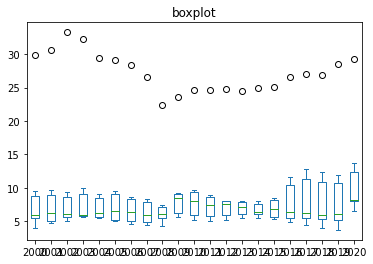

In [43]:
ax = pd_unemployment[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
                      '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']].plot(kind='box', title='boxplot')
plt.show()

## Dataset prison

In [60]:
prison_datapath = "dataset_clean/data_cts_prisons_and_prisoners.xlsx"
prison_dataset = pd.read_excel(prison_datapath)
#prison_dataset.columns = homicide_dataset.iloc[1]
#prison_dataset = prison_dataset[2:]
prison_dataset = prison_dataset.drop_duplicates()
prison_dataset = prison_dataset[(prison_dataset.Year >= 2000) & (prison_dataset.Year <= 2020)]
prison_dataset = prison_dataset.loc[prison_dataset['Unit'] == 'Rate per 100,000 population']
prison_dataset = prison_dataset.loc[prison_dataset['Indicator'] == 'Persons held']
prison_dataset = prison_dataset.loc[prison_dataset['Dimension'] == 'Total']
prison_dataset = prison_dataset.loc[prison_dataset['Category'] == 'Total']
prison_dataset = prison_dataset[prison_dataset['Iso3_code'].isin(['AUS', 'BRA', 'IND', 'SWE', 'USA', 'ZAF']) ]
prison_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 39388 to 53529
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Iso3_code  103 non-null    object 
 1   Country    103 non-null    object 
 2   Region     103 non-null    object 
 3   Subregion  103 non-null    object 
 4   Indicator  103 non-null    object 
 5   Dimension  103 non-null    object 
 6   Category   103 non-null    object 
 7   Year       103 non-null    float64
 8   Unit       103 non-null    object 
 9   VALUE      103 non-null    float64
dtypes: float64(2), object(8)
memory usage: 8.9+ KB


In [61]:
prison_dataset.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Year,Unit,VALUE
39388,AUS,Australia,Oceania,Australia and New Zealand,Persons held,Total,Total,2003.0,"Rate per 100,000 population",120.030597
39392,AUS,Australia,Oceania,Australia and New Zealand,Persons held,Total,Total,2004.0,"Rate per 100,000 population",121.586623
39396,AUS,Australia,Oceania,Australia and New Zealand,Persons held,Total,Total,2007.0,"Rate per 100,000 population",133.790144
39400,AUS,Australia,Oceania,Australia and New Zealand,Persons held,Total,Total,2008.0,"Rate per 100,000 population",133.103366
39404,AUS,Australia,Oceania,Australia and New Zealand,Persons held,Total,Total,2009.0,"Rate per 100,000 population",138.532504


In [62]:
print(sum(prison_dataset['Iso3_code'] == 'AUS'))
print(sum(prison_dataset['Iso3_code'] == 'BRA'))
print(sum(prison_dataset['Iso3_code'] == 'IND'))
print(sum(prison_dataset['Iso3_code'] == 'SWE'))
print(sum(prison_dataset['Iso3_code'] == 'USA'))
print(sum(prison_dataset['Iso3_code'] == 'ZAF'))

16
18
18
18
18
15


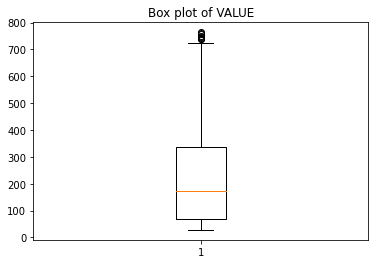

In [63]:
plt.boxplot(prison_dataset.VALUE)
plt.title("Box plot of VALUE")
plt.show()

## Dataset education

In [68]:
tertiary_path = 'Dataset/education_tertiary_25-64_brut.csv'
tertiary_dataset = pd.read_csv(tertiary_path, sep = ',')
pd_tertiary = tertiary_dataset[tertiary_dataset['LOCATION'].isin(['AUS', 'BRA', 'IND', 'SWE', 'USA', 'ZAF'])]
pd_tertiary = pd_tertiary.drop_duplicates()
pd_tertiary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 780
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    92 non-null     object 
 1   INDICATOR   92 non-null     object 
 2   SUBJECT     92 non-null     object 
 3   MEASURE     92 non-null     object 
 4   FREQUENCY   92 non-null     object 
 5   TIME        92 non-null     int64  
 6   Value       92 non-null     float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.5+ KB


In [69]:
pd_tertiary.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EDUADULT,TRY,PC_25_64,A,2000,27.475746,NaN
1,AUS,EDUADULT,TRY,PC_25_64,A,2001,28.977322,NaN
2,AUS,EDUADULT,TRY,PC_25_64,A,2002,30.759785,NaN
3,AUS,EDUADULT,TRY,PC_25_64,A,2003,31.314152,NaN
4,AUS,EDUADULT,TRY,PC_25_64,A,2004,30.823080,NaN


In [72]:
print(sum(pd_tertiary['LOCATION'] == 'AUS'))
print(sum(pd_tertiary['LOCATION'] == 'BRA'))
print(sum(pd_tertiary['LOCATION'] == 'IND'))
print(sum(pd_tertiary['LOCATION'] == 'SWE'))
print(sum(pd_tertiary['LOCATION'] == 'USA'))
print(sum(pd_tertiary['LOCATION'] == 'ZAF'))

21
13
5
21
21
11


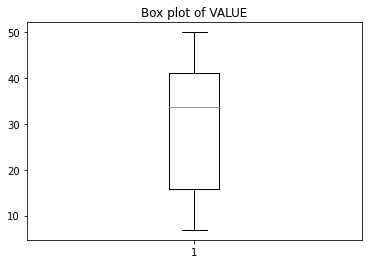

In [74]:
plt.boxplot(pd_tertiary.Value)
plt.title("Box plot of VALUE")
plt.show()

In [75]:
below_path = 'Dataset/education_below-upper-secondary_25-64_brut.csv'
below_datatset = pd.read_csv(below_path, sep = ',')
pd_below = below_datatset[below_datatset['LOCATION'].isin(['AUS', 'BRA', 'IND', 'SWE', 'USA', 'ZAF']) ]
pd_below = pd_below.drop_duplicates()
pd_below.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 773
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    92 non-null     object 
 1   INDICATOR   92 non-null     object 
 2   SUBJECT     92 non-null     object 
 3   MEASURE     92 non-null     object 
 4   FREQUENCY   92 non-null     object 
 5   TIME        92 non-null     int64  
 6   Value       92 non-null     float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.5+ KB


In [76]:
pd_below.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2000,41.212311,NaN
1,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2001,41.076141,NaN
2,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2002,39.050316,NaN
3,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2003,37.519817,NaN
4,AUS,EDUADULT,BUPPSRY,PC_25_64,A,2004,35.879036,NaN


In [77]:
print(sum(pd_below['LOCATION'] == 'AUS'))
print(sum(pd_below['LOCATION'] == 'BRA'))
print(sum(pd_below['LOCATION'] == 'IND'))
print(sum(pd_below['LOCATION'] == 'SWE'))
print(sum(pd_below['LOCATION'] == 'USA'))
print(sum(pd_below['LOCATION'] == 'ZAF'))

21
13
5
21
21
11


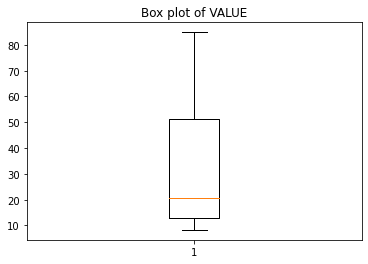

In [78]:
plt.boxplot(pd_below.Value)
plt.title("Box plot of VALUE")
plt.show()

## Dataset bonheur

In [83]:
happiness_path = 'dataset_clean/happiness-cantril-ladder.csv'
happiness_dataset = pd.read_csv(happiness_path, sep = ',')
pd_happiness = happiness_dataset[happiness_dataset['Code'].isin(['AUS', 'BRA', 'IND', 'SWE', 'USA', 'ZAF']) ]
pd_happiness = pd_happiness[(pd_happiness.Year >= 2000) & (pd_happiness.Year <= 2020)]
pd_happiness = pd_happiness.drop_duplicates()
pd_happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 76 to 2131
Data columns (total 4 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Entity                                                             101 non-null    object 
 1   Code                                                               101 non-null    object 
 2   Year                                                               101 non-null    int64  
 3   Life satisfaction in Cantril Ladder (World Happiness Report 2022)  101 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ KB


In [82]:
pd_happiness.head()

,Entity,Code,Year,Life satisfaction in Cantril Ladder (World Happiness Report 2022)
76,Australia,AUS,2003,7.340688
77,Australia,AUS,2005,7.285391
78,Australia,AUS,2006,7.253757
79,Australia,AUS,2008,7.450047
80,Australia,AUS,2009,7.405616


In [85]:
print(sum(pd_happiness['Code'] == 'AUS'))
print(sum(pd_happiness['Code'] == 'BRA'))
print(sum(pd_happiness['Code'] == 'IND'))
print(sum(pd_happiness['Code'] == 'SWE'))
print(sum(pd_happiness['Code'] == 'USA'))
print(sum(pd_happiness['Code'] == 'ZAF'))

16
17
17
17
17
17


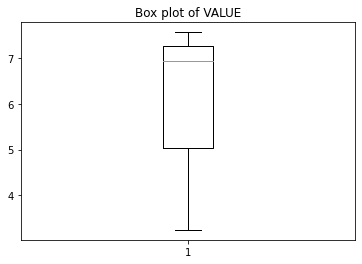

In [88]:
plt.boxplot(pd_happiness['Life satisfaction in Cantril Ladder (World Happiness Report 2022)'])
plt.title("Box plot of VALUE")
plt.show()